<a href="https://colab.research.google.com/github/luadeprataart/Processamento-de-Imagens/blob/main/Aula4_transformacoes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center>Centro Universitário Facens<br/></center>
<br/>
<font size="4"><center><b>Disciplina: Processamento de imagens</b></center></font>
  
<font size="3"><center>Prof. Renato Moraes Silva</center></font>
<br/>
<br/>

# Transformações geométricas

Neste notebook, iremos fazer algumas operações envolvendo cores.

Primeiro, iremos importar as principais bibliotecas.

In [1]:
import numpy as np
import cv2  
import os
import urllib.request
import matplotlib.pyplot as plt

## Escalamento

Para o escalamento, precisamos usar a função **resize** que recebe os seguintes argumentos:
- src: a imagem
- dsize: tamanho desejado da nova imagem. Exemplo: (2,3)
- fx: fator de escala em relação ao eixo horizontal
- fy: fator de escala em relação ao eixo vertical
- interpolation: método de interpolação 
     - cv2.INTER_NEAREST: vizinho mais próximo
     - cv2.INTER_LINEAR: interpolação bilinear
     - cv2.INTER_CUBIC: interpolação bicúbica
     
Se você tentar redimensionar usando escala, defina o parâmetro **dsize** como nulo.

Para testar esse método, crie uma imagem quadriculada em tons de cinza usando operações matriciais: imagem preta com listras horizontais e verticais brancas. Depois, adicione o nome "Facens" nessa imagens. 

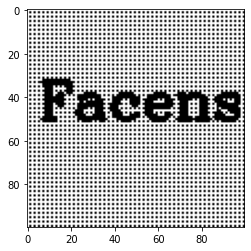

In [37]:
from numpy.core.arrayprint import format_float_scientific
img = np.zeros([100,100], dtype= np.uint8)
#img[ ::, ::2 ] = 255
#img[ ::2, : ] = 255

#Criando a imagem
for i in range(0, img.shape[0], 2):
  img[i, :] = 255
  for j in range(0, img.shape[1], 2):
   img[:, j] = 255

#Adicionando a palavra facens
img1 = cv2.putText(img.copy(),
                   text='Facens',
                   org= (5,50), 
                   fontFace= cv2.FONT_HERSHEY_COMPLEX, 
                   color = 0,
                   thickness = 2,
                   fontScale = 0.8)   

plt.imshow(img1, 'gray', vmin=0, vmax=255)
plt.show()

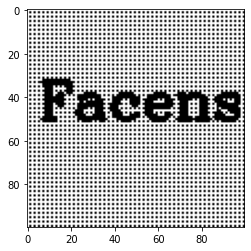

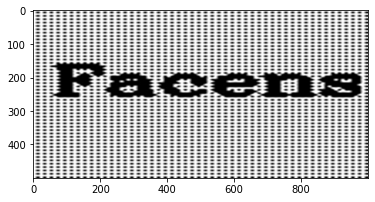

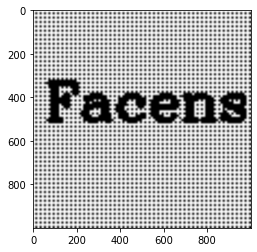

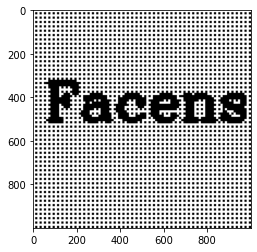

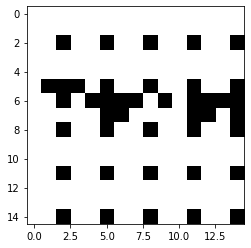

In [47]:
################# COMPLETE O CÓDIGO AQUI  #################
#  
    
img2 = cv2.resize(src= img1.copy(), dsize=None, fx = 10, fy = 5, interpolation = cv2.INTER_CUBIC) #Dobrando pixels

img3 = cv2.resize(src= img1.copy(), dsize=None, fx = 10, fy = 10, interpolation = cv2.INTER_LINEAR) 

img4 = cv2.resize(src= img1.copy(), dsize=None, fx = 10, fy = 10, interpolation = cv2.INTER_NEAREST)

img5 = cv2.resize(src= img1.copy(), dsize=[15,15], fx = None, fy = None, interpolation = cv2.INTER_NEAREST)
    

##########################################################
    
# plota a imagem vermelha
plt.imshow(img1, 'gray', vmin=0, vmax=255)
plt.show()

plt.imshow(img2, 'gray', vmin=0, vmax=255)
plt.show()

plt.imshow(img3, 'gray', vmin=0, vmax=255)
plt.show()

plt.imshow(img4, 'gray', vmin=0, vmax=255)
plt.show()

plt.imshow(img5, 'gray', vmin=0, vmax=255)
plt.show()


As operações de escala, rotação, translação ou cisalhamento também podem ser feitas usando transformação afim.

Para usar a transformação afim, use a função **warpAffine**. Os principais parâmetros são:
- src: imagem
- M: matriz afim. Ela deve ter dimensão 2 x 3. Portanto, não deve ser adicionada a terceira linha da matriz afim tradicional.
- dsize: tamanho da imagem de saída
- flags:  método de interpolação 
     - cv2.INTER_NEAREST: vizinho mais próximo
     - cv2.INTER_LINEAR: interpolação bilinear
     - cv2.INTER_CUBIC: interpolação bicúbica

Use uma operação afim para fazer a escala da imagem feita anteriormente. Faça um escalamento que aumente a imagem de 3 vezes e outro que diminua a imagem. 

A operação afim para escalamento é: 

$$
\begin{bmatrix}
f \\
g \\
1 \\
\end{bmatrix} = % 
% 
\begin{bmatrix}
1/S_x & 0 & 0\\
0 & 1/S_y & 0\\
0 & 0 & 1 
\end{bmatrix}
%
\begin{bmatrix}
u \\
v \\
1 \\
\end{bmatrix} % 
$$

No entanto, na biblioteca OpenCV, é: 

$$
\begin{bmatrix}
f \\
g \\
1 \\
\end{bmatrix} = % 
% 
\begin{bmatrix}
S_x & 0 & 0\\
0 & S_y & 0\\
0 & 0 & 1 
\end{bmatrix}
%
\begin{bmatrix}
u \\
v \\
1 \\
\end{bmatrix} % 
$$

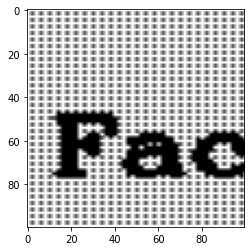

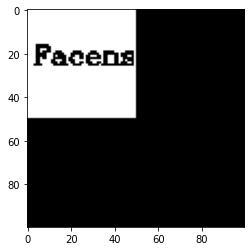

In [53]:
################# COMPLETE O CÓDIGO AQUI  #################
def resize(img, sx, sy):

  altura = img.shape[0]
  largura =img.shape[1]

  matAfim = np.array([
      [sx,0,0],
      [0,sy,0]
       ],dtype = np.float64
 )

  imgret = cv2.warpAffine( src = img, M = matAfim, dsize = (altura,largura))
  return imgret

sx = 2
sy = 1.5


imgMaior = resize(img1, sx, sy)
imgMenor = resize(img1, 0.5, 0.5)


##########################################################

# plota a imagem vermelha
plt.imshow(imgMaior, 'gray', vmin=0, vmax=255)
plt.show()

# plota a imagem vermelha
plt.imshow(imgMenor, 'gray', vmin=0, vmax=255)
plt.show()

Use uma operação afim para fazer a translação da imagem feita anteriormente.

A operação afim para translação é: 

$$
\begin{bmatrix}
f \\
g \\
1 \\
\end{bmatrix} = % 
% 
\begin{bmatrix}
1 & 0 & -d_x\\
0 & 1 & -d_y\\
0 & 0 & 1 
\end{bmatrix}
%
\begin{bmatrix}
u \\
v \\
1 \\
\end{bmatrix} % 
$$

No entanto, na biblioteca OpenCV, em vez de $-d_x$ e $-d_y$, você deve usar $d_x$ e $d_y$:

$$
\begin{bmatrix}
f \\
g \\
1 \\
\end{bmatrix} = % 
% 
\begin{bmatrix}
1 & 0 & d_x\\
0 & 1 & d_y\\
0 & 0 & 1 
\end{bmatrix}
%
\begin{bmatrix}
u \\
v \\
1 \\
\end{bmatrix} % 
$$


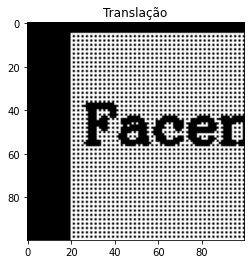

In [57]:
################# COMPLETE O CÓDIGO AQUI  #################
def translacao(img, dx, dy):

  altura = img.shape[0]
  largura =img.shape[1]

  matAfim = np.array([
      [1,0,dx],
      [0,1,dy]
       ],dtype = np.float64
 )

  imgret = cv2.warpAffine( src = img, M = matAfim, dsize = (altura,largura))
  return imgret

imgTranslacao = translacao(img1, 20, 5)

##########################################################

plt.imshow(imgTranslacao, 'gray', vmin = 0, vmax = 255)
plt.title('Translação')
plt.show()
    

Use uma operação afim para fazer o cisalhamento da imagem feita anteriormente. 

A operação afim para translação é: 

$$
\begin{bmatrix}
f \\
g \\
1 \\
\end{bmatrix} = % 
% 
\begin{bmatrix}
1 & -c_v & 0\\
-c_h & 1 & 0\\
0 & 0 & 1 
\end{bmatrix}
%
\begin{bmatrix}
u \\
v \\
1 \\
\end{bmatrix} % 
$$

No entanto, na biblioteca OpenCV, em vez de $-c_v$ e $-c_h$, você deve usar $c_v$ e $c_h$. Além disso, deve trocá-los de lugar: 

$$
\begin{bmatrix}
f \\
g \\
1 \\
\end{bmatrix} = % 
% 
\begin{bmatrix}
1 & c_h & 0\\
c_v & 1 & 0\\
0 & 0 & 1 
\end{bmatrix}
%
\begin{bmatrix}
u \\
v \\
1 \\
\end{bmatrix} % 
$$


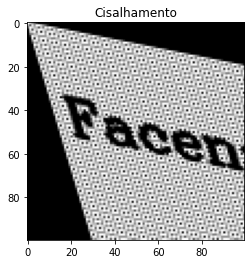

In [64]:
################# COMPLETE O CÓDIGO AQUI  #################
def cisalhamento(img, ch, cv):

  altura = img.shape[0]
  largura =img.shape[1]

  matAfim = np.array([
      [1,ch,0],
      [cv,1,0]
       ],dtype = np.float64
 )

  imgret = cv2.warpAffine( src = img, M = matAfim, dsize = (altura,largura))
  return imgret

imgCisalhamento = cisalhamento(img1, 0.3, 0.2)

##########################################################

plt.imshow(imgCisalhamento, 'gray', vmin = 0, vmax = 255)
plt.title('Cisalhamento')
plt.show()
    

Use uma operação afim para fazer a rotação da imagem feita anteriormente. 

A operação afim para rotação é: 

$$
\begin{bmatrix}
f \\
g \\
1 \\
\end{bmatrix} = % 
% 
\begin{bmatrix}
\cos(\theta) & -\sin(\theta) & 0\\
\sin(\theta) & \cos(\theta) & 0\\
0 & 0 & 1 
\end{bmatrix}
%
\begin{bmatrix}
u \\
v \\
1 \\
\end{bmatrix} % 
$$

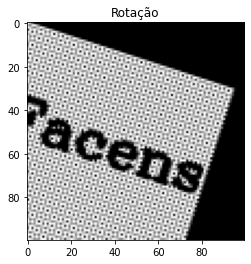

In [67]:
################# COMPLETE O CÓDIGO AQUI  #################

def rotacao(img, theta):

  altura = img.shape[0]
  largura =img.shape[1]

  matAfim = np.array([
      [np.cos(theta),-np.sin(theta),0],
      [np.sin(theta),np.cos(theta),0]
       ],dtype = np.float64
 )

  imgret = cv2.warpAffine( src = img, M = matAfim, dsize = (altura,largura))
  return imgret

imgRotacao = rotacao(img1, 0.314)

##########################################################

plt.imshow(imgRotacao, 'gray', vmin = 0, vmax = 255)
plt.title('Rotação')
plt.show()
    

Criando uma matriz de rotação ao centro.

Para obter uma matriz afim para fazer a rotação em relação a um determinado ponto, use a função **getRotationMatrix2D** que possui os seguintes parâmetros:
- center: o ponto que será usado como centro da rotação
- angle: ângulo da rotação
- scale: fator de escalamento

Depois de obter a matriz afim, use ela como argumento de entrada para a função **warpAffine**.

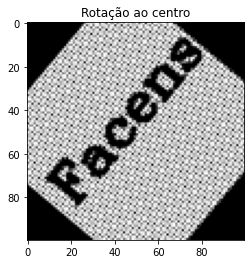

In [70]:
################# COMPLETE O CÓDIGO AQUI  #################
def rotacaoCentro(img, theta):

  altura = img.shape[0]
  largura =img.shape[1]

  centro = (altura/2,largura/2)

  matAfim = cv2.getRotationMatrix2D(center=centro,angle=theta,scale=1)

  imgret = cv2.warpAffine( src = img, M = matAfim, dsize = (altura,largura))
  return imgret

imgRotacao = rotacaoCentro(img1, 50)

##########################################################

plt.imshow(imgRotacao, 'gray', vmin = 0, vmax = 255)
plt.title('Rotação ao centro')
plt.show()

Além das operações principais, uma matriz afim também pode ser usada para outras operações, como o espelhamento.

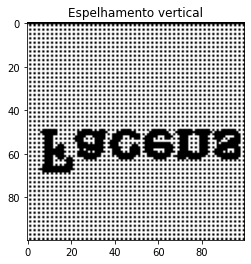

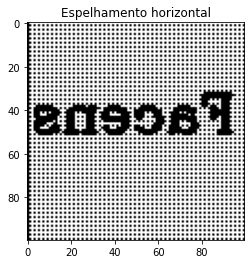

In [74]:
################# COMPLETE O CÓDIGO AQUI  #################
def espeho(img):

  altura = img.shape[0]
  largura =img.shape[1]

  centro = (altura/2,largura/2)

  matAfim = np.array([
      [1,0,0],
      [0,-1,altura]
       ],dtype = np.float64
 )

  imgret = cv2.warpAffine( src = img, M = matAfim, dsize = (altura,largura))
  return imgret

imgEspVertical = espeho(img1)


################# COMPLETE O CÓDIGO AQUI  #################
def espeho(img):

  altura = img.shape[0]
  largura =img.shape[1]

  centro = (altura/2,largura/2)

  matAfim = np.array([
      [-1,0,largura],
      [0,1,0]
       ],dtype = np.float64
 )

  imgret = cv2.warpAffine( src = img, M = matAfim, dsize = (altura,largura))
  return imgret

imgEspHorizontal =  espeho(img1)

##########################################################

plt.imshow(imgEspVertical, 'gray', vmin = 0, vmax = 255)
plt.title('Espelhamento vertical')
plt.show()

plt.imshow(imgEspHorizontal, 'gray', vmin = 0, vmax = 255)
plt.title('Espelhamento horizontal')
plt.show()
    

# Exercícios

Faça uma função que realize a operação de escalamento usando apenas operações matriciais. 